In [351]:
import pandas as pd
import numpy as np

In [199]:
pd.options.plotting.backend = "matplotlib"

In [137]:
vals = range(21, 25)
indexes = [0,1,1,1]  # first file has no סמל ועדה column
dfs = [pd.read_csv(f"{e}.csv", index_col=i, encoding="iso-8859-8") for e, i in zip(vals, indexes)]

# cleanup NaN columns
del dfs[2]["Unnamed: 37"]
del dfs[3]["Unnamed: 46"]

In [138]:
print(dfs[3].keys())

Index(['סמל ועדה', 'סמל ישוב', 'בזב', 'מצביעים', 'פסולים', 'כשרים', 'אמת', 'ב',
       'ג', 'ודעם', 'ז', 'זץ', 'ט', 'י', 'יז', 'ינ', 'יף', 'יק', 'יר', 'כ',
       'כך', 'כן', 'ל', 'מחל', 'מרצ', 'נ', 'ני', 'נר', 'עם', 'פה', 'ףז', 'צי',
       'צכ', 'צף', 'ץ', 'ק', 'קי', 'קך', 'קץ', 'ר', 'רנ', 'רף', 'רק', 'שס',
       'ת'],
      dtype='object')


In [139]:
static_keys = ["סמל ועדה", "שם ישוב", "בזב", "מצביעים", "פסולים", "כשרים"]

In [296]:
df2 = dfs[2].sort_values(by=['בזב'], ascending=False)[:100]
df3 = dfs[3].sort_values(by=['בזב'], ascending=False)[:100]

In [358]:
def scatter_party(p):
    rate3 = df3["מצביעים"] / df3["בזב"]
    rate2 = df2["מצביעים"] / df2["בזב"]
    p3 = df3[p] / rate3
    p2 = df2[p] / rate2
    odf = pd.DataFrame({
        "votes": rate3 / rate2,
        "party": df2[p] / df2["מצביעים"],
        "name": df3[p]
    })
    odf = odf[odf["party"] > 0.05]
    g = odf.plot.scatter(y="votes", x="party")
    m, c = fit_line(x=odf["party"], y=odf["votes"])
    m, b = np.polyfit(odf["party"], odf["votes"], 1)
    g.set_xlim(0, 1)
    g.set_ylim(0.5, 1)
    x = odf["party"].to_numpy()
    g.plot(x, m*x+b, color="red")
    return g

In [370]:
parties = ["מחל", "שס", "ודעם", "פה", "ל", "ג", "אמת"]

rate3 = df3["מצביעים"] / df3["בזב"]
rate2 = df2["מצביעים"] / df2["בזב"]

df3[parties] / df2[parties]

,מחל,שס,ודעם,פה,ל,ג,אמת
שם ישוב,,,,,,,
אום אלפחם,2.687500,1.083333,0.436388,1.200000,0.750000,1.000000,0.227273
אופקים,0.761945,0.932208,0.333333,0.488142,0.743292,1.028207,0.654321
אור יהודה,0.829278,0.856481,0.562500,0.422553,0.826331,0.602041,0.824373
אור עקיבא,0.803556,0.838681,0.083333,0.584626,0.766290,0.678832,0.994872
אילת,0.788089,0.764416,0.379747,0.460652,0.971963,0.524324,0.984724
...,...,...,...,...,...,...,...
רעננה,0.734019,0.875202,0.369748,0.519085,1.070635,0.661247,1.062368
שדרות,0.761988,0.922330,0.516129,0.442543,0.695527,0.441441,0.438687
שוהם,0.748437,0.893004,0.666667,0.518784,1.081560,0.566667,1.092841


<AxesSubplot:xlabel='party', ylabel='votes'>

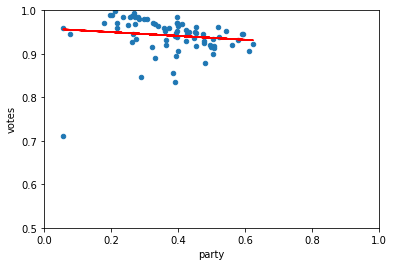

In [359]:
scatter_party("מחל")

<AxesSubplot:xlabel='party', ylabel='votes'>

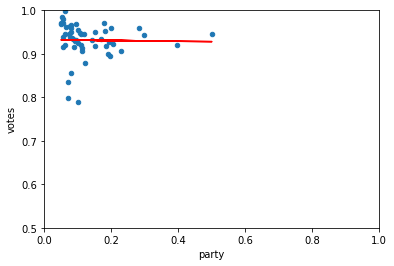

In [360]:
scatter_party("שס")

<AxesSubplot:xlabel='party', ylabel='votes'>

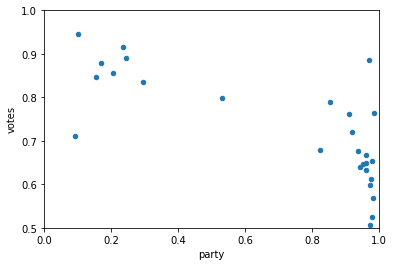

In [362]:
scatter_party("ודעם")

<AxesSubplot:xlabel='party', ylabel='votes'>

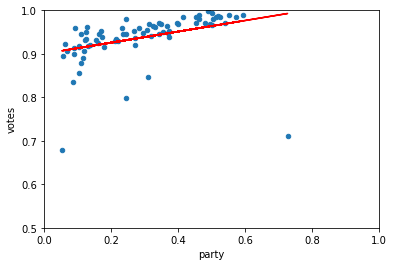

In [363]:
scatter_party("פה")

<AxesSubplot:xlabel='party', ylabel='votes'>

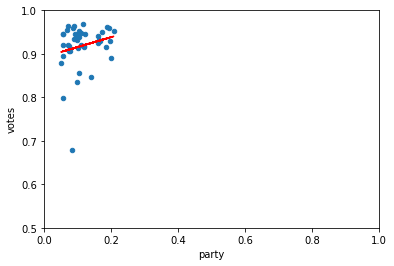

In [364]:
scatter_party("ל")

<AxesSubplot:xlabel='party', ylabel='votes'>

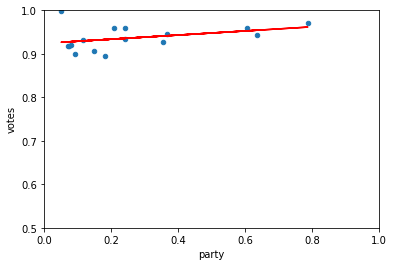

In [365]:
scatter_party("ג")

<AxesSubplot:xlabel='party', ylabel='votes'>

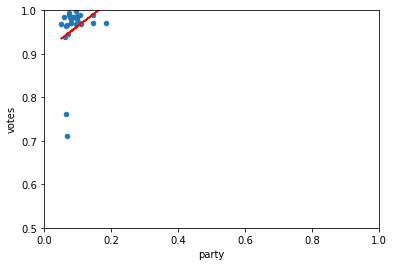

In [366]:
scatter_party("אמת")